# Parametric vs Non- Parametric ML Model

Parametric Model : Parametric models are those where we assume a fixed number of parameters to define the model. The model structure is specified in advance and does not change based on the amount of training data.

ex. Linear Regression, Logistic Regression, Neural Networks.

Non- Parametric Model: Non-parametric models do not assume a fixed number of parameters. Instead, the number of parameters can grow with the amount of training data. The model structure is not predetermined and can adapt to the complexity of the data.

ex. Decision Tree, SVM, KNN.

# Batch Gradient Descent

Batch Gradient Descent is an iterative optimization algorithm that calculates the gradient of the cost function with respect to the parameters for the entire training dataset. It updates the model parameters in the direction that reduces the cost function.

Initialize Parameters: Start with initial guesses for the model parameters (weights and biases).

Calculate the Cost Function: Compute the cost function (e.g., Mean Squared Error for regression) to quantify the difference between the predicted and actual values for the entire dataset.

Compute Gradients: Calculate the gradient of the cost function with respect to each parameter. This involves differentiating the cost function to determine how each parameter should be adjusted to reduce the cost.

Adjust the parameters in the direction opposite to the gradient. The step size of this adjustment is controlled by the learning rate

Repeat the process of computing predictions, calculating the cost function, computing gradients, and updating parameters until the cost function converges (i.e., it stops decreasing significantly) or a specified number of iterations is reached.

Stable Convergence: Batch Gradient Descent provides a stable and smooth convergence because it uses the entire dataset to compute the gradients.

Computationally Expensive: For large datasets, computing the gradients for the entire dataset can be very slow and computationally expensive.

Memory Intensive: Requires loading the entire dataset into memory, which may not be feasible for very large datasets.




In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Separate features and target
X = data.drop('MedHouseVal', axis=1).values
y = data['MedHouseVal'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 6.0152 - val_loss: 5.3731
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 5.2933 - val_loss: 4.7740
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 4.7030 - val_loss: 4.2745
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 4.2109 - val_loss: 3.8533
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 3.7957 - val_loss: 3.4952
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 3.4428 - val_loss: 3.1898
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 3.1418 - val_loss: 2.9286
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 2.8845 - val_loss: 2.7052
Epoch 9/100
1/1 [==============================] - 0s 69ms/step - loss: 2.6646 - val_loss: 2.5139
Epoch 10/100
1/1 [==============================] - 0s 71ms/step - loss: 2.4763 - val_loss: 2.3497
Epoch 11/100
1/1 [

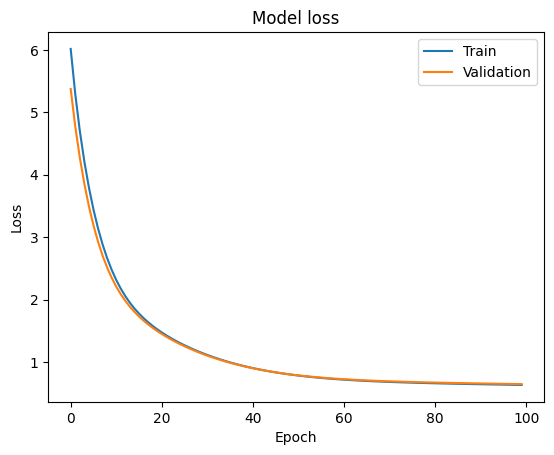

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0], validation_split=0.2)
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In the model.fit method, the batch_size=32 argument tells Keras to use Mini-Batch Gradient Descent with a batch size of 32. If we set batch_size to the size of the entire training dataset, it would perform Batch Gradient Descent.

By setting batch_size to the number of training samples (X_train.shape[0]), we ensure that Batch Gradient Descent is used.

# Stochastic Gradient Descent (SGD)

To use Stochastic Gradient Descent (SGD) in Keras, you simply need to set the batch_size parameter to 1 when calling the fit method. This ensures that the model updates its parameters after processing each training example, which is the essence of SGD.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Separate features and target
X = data.drop('MedHouseVal', axis=1).values
y = data['MedHouseVal'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                576       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/2
13209/13209 [==============================] - 30s 2ms/step - loss: nan - val_loss: nan
Epoch 2/2
13209/13209 [==============================] - 29s 2ms/step - loss: nan - val_loss: nan


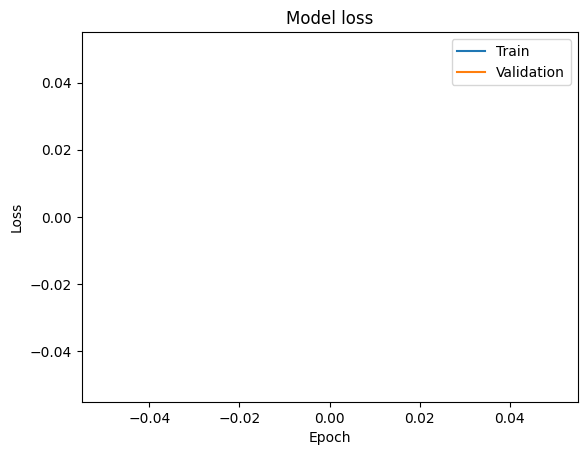

In [ ]:
# Train the model with Stochastic Gradient Descent (batch_size=1)
history = model.fit(X_train, y_train, epochs=2, batch_size=1, validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse:.2f}')

# Predict on the test set
y_pred = model.predict(X_test)

129/129 [==============================] - 1s 4ms/step - loss: nan
Mean Squared Error on test set: nan
129/129 [==============================] - 1s 3ms/step


# MiniBatch Gradient Descend :

To use Mini-Batch Gradient Descent in Keras, you need to set the batch_size parameter to a value between 1 and the size of the entire dataset when calling the fit method. This ensures that the model updates its parameters after processing a subset of the training examples (mini-batch) at each step.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Separate features and target
X = data.drop('species', axis=1).values
y = data['species'].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for the 3 classes
])

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                320       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
6/6 [==============================] - 1s 86ms/step - loss: 1.0982 - accuracy: 0.4479 - val_loss: 0.9864 - val_accuracy: 0.5833
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0419 - accuracy: 0.4792 - val_loss: 0.9509 - val_accuracy: 0.6250
Epoch 3/100
6/6 [==============================] - 0s 32ms/step - loss: 0.9905 - accuracy: 0.5521 - val_loss: 0.9188 - val_accuracy: 0.7083
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.9478 - accuracy: 0.6458 - val_loss: 0.8902 - val_accuracy: 0.7500
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.9100 - accuracy: 0.7083 - val_loss: 0.8638 - val_accuracy: 0.7500
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 0.8746 - accuracy: 0.8021 - val_loss: 0.8390 - val_accuracy: 0.7917
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 0.8430 - accuracy: 0.8125 - val_loss: 0.8156 - val_accuracy: 0.7917
Epoch 8/100
6/6 [===

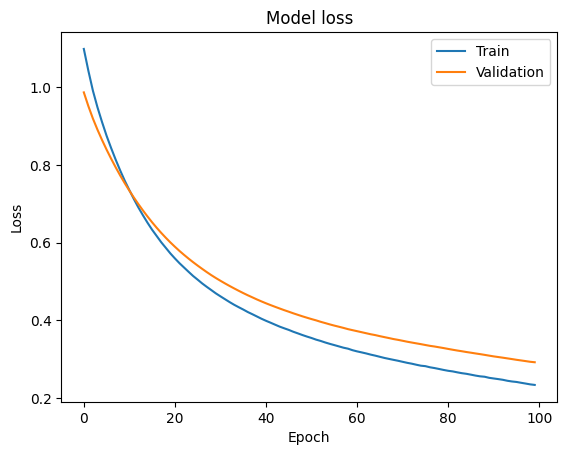

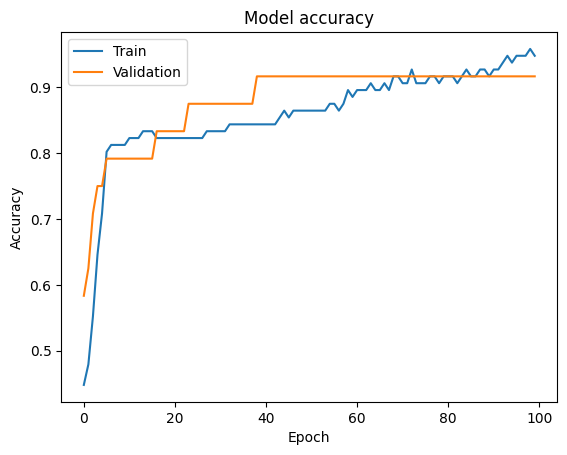

1/1 [==============================] - 0s 32ms/step - loss: 0.1915 - accuracy: 1.0000
Test Loss: 0.19147615134716034
Test Accuracy: 1.0
1/1 [==============================] - 0s 61ms/step


In [ ]:
# Train the model with Mini-Batch Gradient Descent (batch_size=16)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on the test set
y_pred = model.predict(X_test)


# Batch GD vs Stochastic GD vs Minibatch GD

Batch GD : If you have 1,000,000 samples and use Batch Gradient Descent, you would calculate the gradient based on all 1,000,000 samples before making an update to the model parameters.

Stochastic GD : If you have 1,000,000 samples and use Stochastic Gradient Descent with a batch size of 1, you would update the model parameters after processing each of the 1,000,000 samples individually.

Minibatch GD : If you have 1,000,000 samples and use Mini-Batch Gradient Descent with a batch size of 32, you would divide the dataset into mini-batches of 32 samples each and update the model parameters after processing each mini-batch.

# SGD With Momentum

Stochastic Gradient Descent (SGD) with Momentum is an extension of the standard SGD algorithm that helps accelerate the convergence of the gradient descent process and improves the stability of the optimization. It does this by incorporating information from previous gradients into the current update, which helps smooth out the oscillations and speeds up convergence.

Momentum helps accelerate SGD by using a moving average of past gradients to smooth out updates.

It introduces a "momentum" term that carries forward a fraction of the previous update to the current update.

**Accelerates Convergence:** By accumulating gradients over time, momentum helps to speed up the convergence process, especially in the direction of the gradient.

**Reduces Oscillations:** It helps to smooth out the noisy updates that can occur with SGD, leading to more stable convergence.

**Helps Escape Local Minima:** The accumulated momentum can help the optimizer escape shallow local minima by providing enough "inertia" to continue moving in the direction of the gradient.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 183ms/step - loss: 1.0782 - accuracy: 0.3125 - val_loss: 1.0191 - val_accuracy: 0.5417
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0325 - accuracy: 0.4688 - val_loss: 0.9637 - val_accuracy: 0.6667
Epo

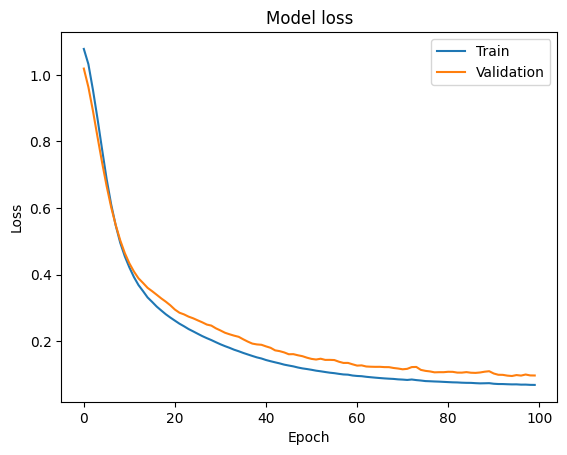

1/1 [==============================] - 0s 73ms/step - loss: 0.0590 - accuracy: 0.9667
Loss on test set: 0.06
Accuracy on test set: 0.97


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Separate features and target
X = data.drop('species', axis=1).values
y = data['species'].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for the 3 classes
])

# Compile the model with SGD optimizer with momentum
# Momentum set to 0.9
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9) , loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model with Mini-Batch Gradient Descent (batch_size=32)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss:.2f}')
print(f'Accuracy on test set: {accuracy:.2f}')


# NADAM (Nestrov Accelerated Gradient)

Epoch 1/100
3/3 [==============================] - 2s 114ms/step - loss: 1.0733 - accuracy: 0.4792 - val_loss: 1.1248 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 1.0191 - accuracy: 0.6771 - val_loss: 1.0706 - val_accuracy: 0.4583
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.9645 - accuracy: 0.7083 - val_loss: 1.0124 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.9062 - accuracy: 0.7083 - val_loss: 0.9532 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8472 - accuracy: 0.7188 - val_loss: 0.8959 - val_accuracy: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7892 - accuracy: 0.7396 - val_loss: 0.8409 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.7353 - accuracy: 0.8333 - val_loss: 0.7894 - val_accuracy: 0.8333
Epoch 8/100
3/3 [==

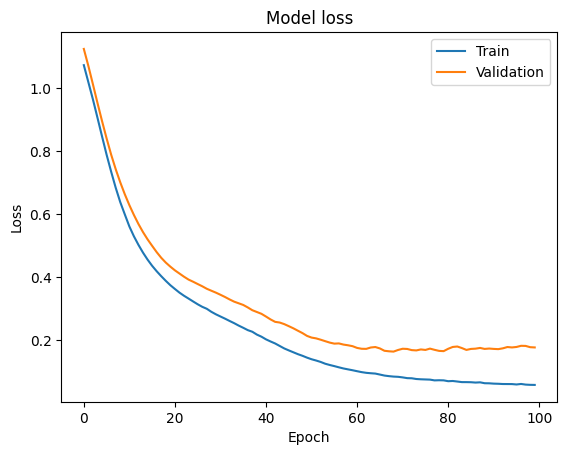

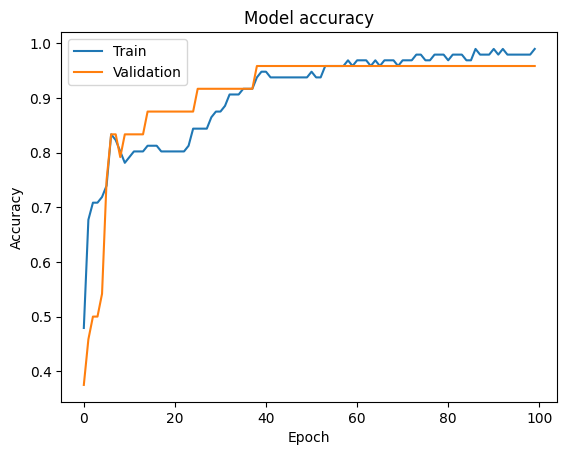

1/1 [==============================] - 0s 36ms/step - loss: 0.0403 - accuracy: 1.0000
Loss on test set: 0.04
Accuracy on test set: 1.00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Separate features and target
X = data.drop('species', axis=1).values
y = data['species'].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for the 3 classes
])

# Compile the model with Nadam optimizer
nadam = Nadam(learning_rate=0.001)  # You can adjust the learning rate
model.compile(optimizer=nadam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss:.2f}')
print(f'Accuracy on test set: {accuracy:.2f}')


# RMSprop (Root Mean Squared Propagation)

RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to address the issues associated with vanishing and exploding gradients, which can occur during training deep neural networks. RMSprop adapts the learning rate for each parameter individually based on a moving average of the squared gradients, making it particularly useful for training models with noisy gradients or non-stationary objectives.

Epoch 1/100
3/3 [==============================] - 1s 197ms/step - loss: 1.0241 - accuracy: 0.5104 - val_loss: 0.8869 - val_accuracy: 0.7917
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 0.8776 - accuracy: 0.7917 - val_loss: 0.7783 - val_accuracy: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.7820 - accuracy: 0.8125 - val_loss: 0.7017 - val_accuracy: 0.8750
Epoch 4/100
3/3 [==============================] - 0s 93ms/step - loss: 0.7075 - accuracy: 0.8125 - val_loss: 0.6438 - val_accuracy: 0.8750
Epoch 5/100
3/3 [==============================] - 0s 95ms/step - loss: 0.6427 - accuracy: 0.8125 - val_loss: 0.5937 - val_accuracy: 0.8750
Epoch 6/100
3/3 [==============================] - 0s 47ms/step - loss: 0.5924 - accuracy: 0.8125 - val_loss: 0.5495 - val_accuracy: 0.8750
Epoch 7/100
3/3 [==============================] - 0s 66ms/step - loss: 0.5461 - accuracy: 0.8125 - val_loss: 0.5129 - val_accuracy: 0.8750
Epoch 8/100
3/3 [==

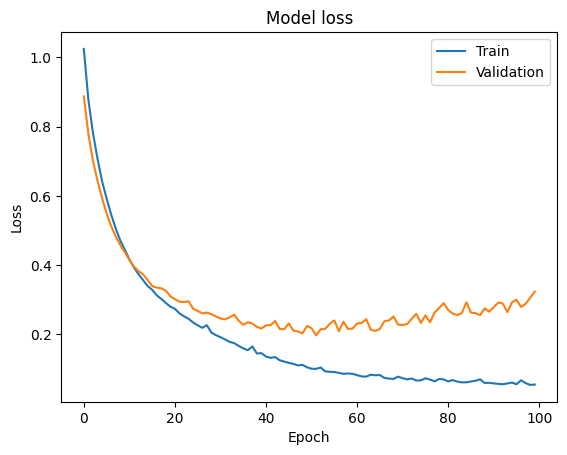

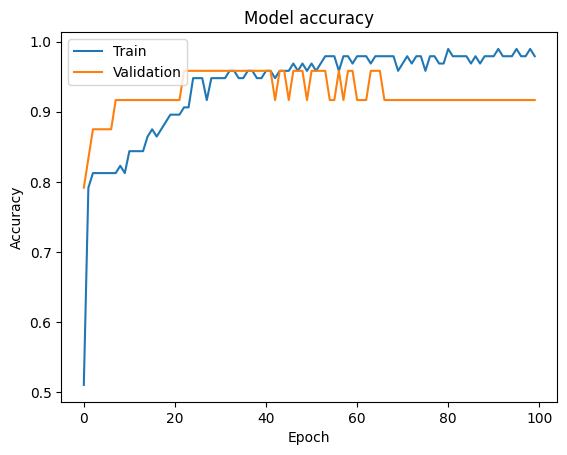

1/1 [==============================] - 0s 29ms/step - loss: 0.0454 - accuracy: 1.0000
Loss on test set: 0.05
Accuracy on test set: 1.00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Separate features and target
X = data.drop('species', axis=1).values
y = data['species'].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for the 3 classes
])

# Compile the model with RMSprop optimizer
rmsprop = RMSprop(learning_rate=0.001)  # You can adjust the learning rate
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss:.2f}')
print(f'Accuracy on test set: {accuracy:.2f}')



Other Optimization Methods : AdaGrad(Adaptive Gradient), AdaDelta, **ADAM (Adaptive Momentum Estimation)**-> (Combination of Mumentum and RMSprop)-> Uses moving averages of gradients (momentum) and squared gradients (RMSprop) to adapt the learning rate.

# KNN (K - Nearest Neighbours)

The k-Nearest Neighbors (k-NN) algorithm is a simple, yet effective, machine learning algorithm used for both classification and regression tasks.

 Imagine you have a dataset where each data point is plotted in a multi-dimensional space. Each data point belongs to a class (for classification) or has a value (for regression).
 The fundamental idea of k-NN is to find the k nearest data points (neighbors) to a new, unknown data point and make a prediction based on those neighbors.

**How k-NN Works** :
Choose k: Decide on the number of neighbors (k) to consider.

Distance Metric: Select a distance metric to measure the distance between data points (e.g., Euclidean distance, Manhattan distance).

Find Neighbors: For a given new data point, calculate the distance to all other data points in the dataset and find the k nearest neighbors.

Make Prediction:

Classification: The new data point is assigned to the class that is most common among its k nearest neighbors (majority vote).

Regression: The value for the new data point is predicted as the average (or weighted average) of the values of its k nearest neighbors.

Classification Example: Imagine you have a scatter plot with points of two colors, red and blue, representing two classes. When you introduce a new point, k-NN finds the k closest points to this new point. If most of these k points are red, the new point is classified as red; if most are blue, it is classified as blue.

Regression Example: In a scatter plot where each point has a numeric value, k-NN would average the values of the k nearest points to predict the value of a new point.

**Key Points:**
No Training Phase: Unlike many other algorithms, k-NN doesn’t have an explicit training phase. All the computation is deferred until prediction.

Lazy Learning: It's called a "lazy" algorithm because it simply stores the training data and waits until a prediction is required.

Scalability: k-NN can be computationally expensive, especially with large datasets, because it requires calculating the distance to many points.

# Applying KNN in Python (Classification Problem)

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Preprocessing the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = data.iloc[:, :-1]
y = data['species']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'n_neighbors': 3}
Best Score: 0.95


In [ ]:
# Train the classifier with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# KNN Regression -

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

#all the features are numerical here. If one of the features are categorical
#then we need to apply One ot encoding.

# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
data = california.frame

# Display the first few rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Create the k-NN regressor
knn_regressor = KNeighborsRegressor()

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score (MSE): {-grid_search.best_score_:.2f}')

# Train the regressor with the best parameters
best_knn_regressor = grid_search.best_estimator_
best_knn_regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predict the target for the test set
y_pred = best_knn_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')


Best Parameters: {'n_neighbors': 11}
Best Score (MSE): 0.41
Mean Squared Error: 0.42
R^2 Score: 0.68


For Linear Data Regression we can use : LinearRegression, Linear SVM.

For Non-Lieanr Data we have to use: Decison Tree(CART-Classification and Regression Tree,ID3,C4.5), Random Forest, Gradient Boosting (XGBoost,LightGBM, catBoost), SVM With Non-Linear Function (polinomial, radial basis function-rbf, sigmoind), KNN, Neural Network (ANN, CNN, RNN), Polynimial Regression.

# Curse of Dimensionality:

It refers to various phenomena occur when analyzing and organising data in igher dimensional spaces that do not occure in low dimensional space.

**Increased Sparsity of Data:** In high-dimensional spaces, data points tend to become sparse. This means that as the number of dimensions increases, the volume of the space increases exponentially, and the available data points spread out more thinly across this space. This sparsity makes it harder to find meaningful patterns or relationships in the data.

**Distance Measures Become Less Informative:** In high-dimensional spaces, the distance between any two points tends to become similar. This can render distance-based algorithms, such as k-Nearest Neighbors (k-NN), less effective.

**Increased Computational Complexity:**

**Overfitting:**

**Increased Need for Large Data Sets:**

In a low-dimensional space, such as a 2D plane, the distance between points can be easily interpreted and is informative. However, in a high-dimensional space, such as a 1000-dimensional space, the Euclidean distance between points tends to converge to a single value. This makes it difficult to differentiate between close and distant points, which is a problem for clustering and nearest neighbor algorithms.


# Mitigation Strategies for Dimension Reduction:

**Dimensionality Reduction:**

Techniques such as Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Linear Discriminant Analysis (LDA) can reduce the number of dimensions while preserving the most important information.

**Feature Selection:** Filter Method, Wrapper Method,Embedded Method

**Regularization:**

Techniques such as L1 and L2 regularization can help prevent overfitting by penalizing large coefficients, effectively reducing the complexity of the model.

**Use of Algorithms that Handle High Dimensionality:**

Some algorithms, like tree-based methods (e.g., Random Forest, Gradient Boosting) and certain types of neural networks, can handle high-dimensional data more effectively.



# Principle Component Analysis :

PCA is a statisical tecnique used for dimensionality reduction while preserving as muc variance (Information) as possible.It transforms the original features into a new set of uncorrelated features called principle components.

**Key Concepts :**

**Variance :** Variance measures the spread of the data. PCA aims to maximize the variance captured in the new features (principal components).

**Principal Components:** Principal components are new variables constructed as linear combinations of the original features. The first principal component captures the most variance, the second captures the second most variance (orthogonal to the first), and so on.
 A principal component is a vector (direction) in the feature space that accounts for the largest variance in the data. In PCA (Principal Component Analysis), these components are orthogonal (perpendicular) to each other and are ranked according to the amount of variance they capture. (It is Eigen Vector.

**Orthogonality:** Each principal component is orthogonal (perpendicular) to the others, ensuring that the new features are uncorrelated.

**Eigenvalues and Eigenvectors:**
Eigenvalues represent the amount of variance captured by each principal component.
Eigenvectors define the direction of the principal components in the feature space. (Eigen Vectors are the principle components.)


# **Steps of PCA:**

**Standardize the Data:** Since PCA is affected by the scale of the features, it is crucial to standardize the data (mean = 0, variance = 1) before applying PCA.

**Compute the Covariance Matrix:** The covariance matrix captures the relationships (covariances) between different features.

cov = 1/(n-1)*transpose(X)*X

X = Original Data Matrix
n = no. of observation

**Compute Eigenvalues and Eigenvectors:**
Solve the eigenvalue problem for the covariance matrix to find the eigenvalues and eigenvectors.

cov x v = lamda x v

lamda = eigenvalue, v=eigenvector

**Select Principal Components:**
Choose the top k eigenvectors corresponding to the k largest eigenvalues to form the new feature space. These eigenvectors are the principal components.

**Transform the Data:** Project the original standardize data onto te new feature space formed by selected eigenvector.

Y = X*W
W = Matrix of selected Eigen Vector and Y = Transformed Data in the new Feature Space.

# Example in Python:

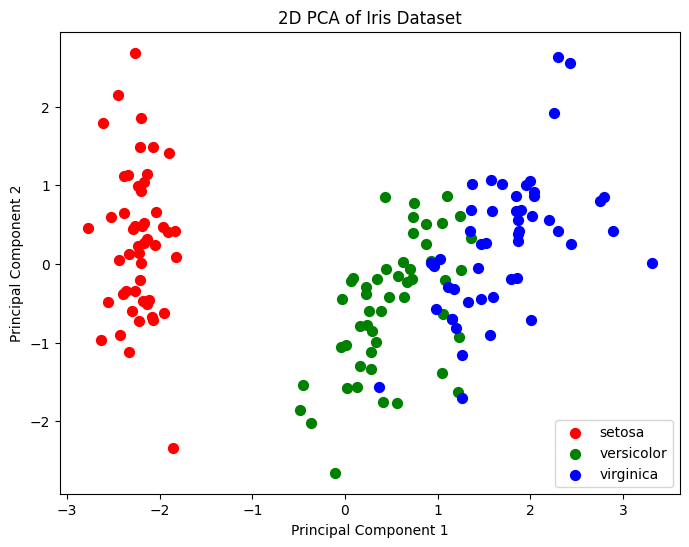

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Standardize the features
features = data.iloc[:, :-1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the principal components with the species column
final_df = pd.concat([principal_df, data[['species']]], axis=1)

# Plot the 2D projection
plt.figure(figsize=(8, 6))
targets = iris.target_names
colors = ['r', 'g', 'b']
for target, color in zip(range(len(targets)), colors):
    indices = final_df['species'] == target
    plt.scatter(final_df.loc[indices, 'Principal Component 1'],
                final_df.loc[indices, 'Principal Component 2'],
                c=color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('2D PCA of Iris Dataset')
plt.show()


In [ ]:
final_df.head()

,Principal Component 1,Principal Component 2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


# SVM (Support Vector Machines)